In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tabithamerinclitus","key":"d18d8bab03d9affd9ee402aed176a98f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip -d ./data

Streaming output truncated to the last 5000 lines.
  inflating: ./data/train/sad/Training_65242339.jpg  
  inflating: ./data/train/sad/Training_65267116.jpg  
  inflating: ./data/train/sad/Training_65275626.jpg  
  inflating: ./data/train/sad/Training_6529266.jpg  
  inflating: ./data/train/sad/Training_65329617.jpg  
  inflating: ./data/train/sad/Training_65338712.jpg  
  inflating: ./data/train/sad/Training_65338797.jpg  
  inflating: ./data/train/sad/Training_65387162.jpg  
  inflating: ./data/train/sad/Training_65404494.jpg  
  inflating: ./data/train/sad/Training_65426218.jpg  
  inflating: ./data/train/sad/Training_65430136.jpg  
  inflating: ./data/train/sad/Training_65437377.jpg  
  inflating: ./data/train/sad/Training_6545735.jpg  
  inflating: ./data/train/sad/Training_65463385.jpg  
  inflating: ./data/train/sad/Training_65473985.jpg  
  inflating: ./data/train/sad/Training_65502829.jpg  
  inflating: ./data/train/sad/Training_65505359.jpg  
  inflating: ./data/train/sad/Tra

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
train_dir = "./data/train"
test_dir = "./data/test"


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=128,
    color_mode="grayscale",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=128,
    color_mode="grayscale",
    class_mode="categorical"
)

num_classes = train_generator.num_classes


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
    callbacks=[checkpoint, earlystop]
)


Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2423 - loss: 1.8234
Epoch 1: val_accuracy improved from -inf to 0.28864, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 33s 117ms/step - accuracy: 0.2424 - loss: 1.8233 - val_accuracy: 0.2886 - val_loss: 1.7027
Epoch 2/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.2500 - loss: 1.7517
Epoch 2: val_accuracy did not improve from 0.28864
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2500 - loss: 1.7517 - val_accuracy: 0.2882 - val_loss: 1.7061
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3009 - loss: 1.7111
Epoch 3: val_accuracy improved from 0.28864 to 0.43959, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 29s 98ms/step - accuracy: 0.3010 - loss: 1.7110 - val_accuracy: 0.4396 - val_loss: 1.4789
Epoch 4/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.3906 - loss: 1.6181
Epoch 4: val_accuracy did not improve from 0.43959
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3906 - loss: 1.6181 - val_accuracy: 0.4326 - val_loss: 1.4836
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3769 - loss: 1.5801
Epoch 5: val_accuracy improved from 0.43959 to 0.47614, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.3770 - loss: 1.5799 - val_accuracy: 0.4761 - val_loss: 1.3702
Epoch 6/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.3906 - loss: 1.4879
Epoch 6: val_accuracy improved from 0.47614 to 0.47740, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3906 - loss: 1.4879 - val_accuracy: 0.4774 - val_loss: 1.3636
Epoch 7/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4283 - loss: 1.4660
Epoch 7: val_accuracy improved from 0.47740 to 0.50698, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 181ms/step - accuracy: 0.4284 - loss: 1.4659 - val_accuracy: 0.5070 - val_loss: 1.2945
Epoch 8/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5234 - loss: 1.4106
Epoch 8: val_accuracy did not improve from 0.50698
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5234 - loss: 1.4106 - val_accuracy: 0.5017 - val_loss: 1.2989
Epoch 9/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4626 - loss: 1.3983
Epoch 9: val_accuracy improved from 0.50698 to 0.52623, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.4627 - loss: 1.3982 - val_accuracy: 0.5262 - val_loss: 1.2339
Epoch 10/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4219 - loss: 1.3863
Epoch 10: val_accuracy improved from 0.52623 to 0.52665, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4219 - loss: 1.3863 - val_accuracy: 0.5266 - val_loss: 1.2317
Epoch 11/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4894 - loss: 1.3438
Epoch 11: val_accuracy improved from 0.52665 to 0.53557, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.4894 - loss: 1.3438 - val_accuracy: 0.5356 - val_loss: 1.2024
Epoch 12/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5547 - loss: 1.2644
Epoch 12: val_accuracy did not improve from 0.53557
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5547 - loss: 1.2644 - val_accuracy: 0.5338 - val_loss: 1.2074
Epoch 13/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4971 - loss: 1.3171
Epoch 13: val_accuracy improved from 0.53557 to 0.55357, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.4972 - loss: 1.3170 - val_accuracy: 0.5536 - val_loss: 1.1647
Epoch 14/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.4609 - loss: 1.2700
Epoch 14: val_accuracy did not improve from 0.55357
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4609 - loss: 1.2700 - val_accuracy: 0.5523 - val_loss: 1.1701
Epoch 15/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5051 - loss: 1.2914
Epoch 15: val_accuracy did not improve from 0.55357
224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.5051 - loss: 1.2914 - val_accuracy: 0.5142 - val_loss: 1.2555
Epoch 16/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4922 - loss: 1.2012
Epoch 16: val_accuracy did not improve from 0.55357
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4922 - loss: 1.2012 - val_accuracy: 0.5140 - val_loss: 1.2551
Epoch 17/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5188 - loss: 1.2679
Epoch 17: val_a

224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - accuracy: 0.5188 - loss: 1.2679 - val_accuracy: 0.5646 - val_loss: 1.1435
Epoch 18/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4922 - loss: 1.2448
Epoch 18: val_accuracy improved from 0.56459 to 0.56557, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4922 - loss: 1.2448 - val_accuracy: 0.5656 - val_loss: 1.1410
Epoch 19/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5214 - loss: 1.2555
Epoch 19: val_accuracy improved from 0.56557 to 0.57324, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 60s 97ms/step - accuracy: 0.5214 - loss: 1.2555 - val_accuracy: 0.5732 - val_loss: 1.1354
Epoch 20/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5547 - loss: 1.1643
Epoch 20: val_accuracy did not improve from 0.57324
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5547 - loss: 1.1643 - val_accuracy: 0.5720 - val_loss: 1.1382
Epoch 21/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5315 - loss: 1.2238
Epoch 21: val_accuracy improved from 0.57324 to 0.57547, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.5315 - loss: 1.2238 - val_accuracy: 0.5755 - val_loss: 1.1151
Epoch 22/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4688 - loss: 1.3737
Epoch 22: val_accuracy did not improve from 0.57547
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4688 - loss: 1.3737 - val_accuracy: 0.5732 - val_loss: 1.1223
Epoch 23/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5394 - loss: 1.2213
Epoch 23: val_accuracy did not improve from 0.57547
224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.5394 - loss: 1.2213 - val_accuracy: 0.5744 - val_loss: 1.1185
Epoch 24/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5000 - loss: 1.2811
Epoch 24: val_accuracy did not improve from 0.57547
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5000 - loss: 1.2811 - val_accuracy: 0.5737 - val_loss: 1.1187
Epoch 25/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5432 - loss: 1.2035
Epoch 25: val_a

224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.5432 - loss: 1.2035 - val_accuracy: 0.5811 - val_loss: 1.1047
Epoch 26/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4766 - loss: 1.2479
Epoch 26: val_accuracy did not improve from 0.58105
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4766 - loss: 1.2479 - val_accuracy: 0.5785 - val_loss: 1.1132
Epoch 27/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5430 - loss: 1.1988
Epoch 27: val_accuracy improved from 0.58105 to 0.58705, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.5430 - loss: 1.1988 - val_accuracy: 0.5871 - val_loss: 1.0860
Epoch 28/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5703 - loss: 1.1342
Epoch 28: val_accuracy improved from 0.58705 to 0.58887, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5703 - loss: 1.1342 - val_accuracy: 0.5889 - val_loss: 1.0819
Epoch 29/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5443 - loss: 1.1953
Epoch 29: val_accuracy did not improve from 0.58887
224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 181ms/step - accuracy: 0.5443 - loss: 1.1953 - val_accuracy: 0.5843 - val_loss: 1.0893
Epoch 30/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5547 - loss: 1.2078
Epoch 30: val_accuracy did not improve from 0.58887
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5547 - loss: 1.2078 - val_accuracy: 0.5822 - val_loss: 1.0947
Epoch 31/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5499 - loss: 1.1788
Epoch 31: val_accuracy did not improve from 0.58887
224/224 ━━━━━━━━━━━━━━━━━━━━ 82s 191ms/step - accuracy: 0.5499 - loss: 1.1788 - val_accuracy: 0.5876 - val_loss: 1.0968
Epoch 32/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5312 - loss: 1.1216
Epoch 32: val

224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5312 - loss: 1.1216 - val_accuracy: 0.5915 - val_loss: 1.0885
Epoch 33/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5538 - loss: 1.1735
Epoch 33: val_accuracy did not improve from 0.59152
224/224 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.5538 - loss: 1.1735 - val_accuracy: 0.5900 - val_loss: 1.0822
Epoch 34/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6484 - loss: 1.0272
Epoch 34: val_accuracy did not improve from 0.59152
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6484 - loss: 1.0272 - val_accuracy: 0.5900 - val_loss: 1.0818
Epoch 35/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5647 - loss: 1.1602
Epoch 35: val_accuracy improved from 0.59152 to 0.59277, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.5647 - loss: 1.1602 - val_accuracy: 0.5928 - val_loss: 1.0698
Epoch 36/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5391 - loss: 1.1688
Epoch 36: val_accuracy did not improve from 0.59277
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5391 - loss: 1.1688 - val_accuracy: 0.5924 - val_loss: 1.0707
Epoch 37/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5636 - loss: 1.1625
Epoch 37: val_accuracy improved from 0.59277 to 0.59780, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.5636 - loss: 1.1625 - val_accuracy: 0.5978 - val_loss: 1.0680
Epoch 38/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5625 - loss: 1.2344
Epoch 38: val_accuracy improved from 0.59780 to 0.59863, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5625 - loss: 1.2344 - val_accuracy: 0.5986 - val_loss: 1.0688
Epoch 39/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5687 - loss: 1.1491
Epoch 39: val_accuracy improved from 0.59863 to 0.60338, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.5687 - loss: 1.1491 - val_accuracy: 0.6034 - val_loss: 1.0685
Epoch 40/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5234 - loss: 1.1576
Epoch 40: val_accuracy did not improve from 0.60338
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5234 - loss: 1.1576 - val_accuracy: 0.6025 - val_loss: 1.0643
Epoch 41/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5750 - loss: 1.1388
Epoch 41: val_accuracy improved from 0.60338 to 0.60393, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 82s 195ms/step - accuracy: 0.5749 - loss: 1.1388 - val_accuracy: 0.6039 - val_loss: 1.0498
Epoch 42/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5469 - loss: 1.0618
Epoch 42: val_accuracy did not improve from 0.60393
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5469 - loss: 1.0618 - val_accuracy: 0.6037 - val_loss: 1.0476
Epoch 43/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5679 - loss: 1.1349
Epoch 43: val_accuracy did not improve from 0.60393
224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - accuracy: 0.5679 - loss: 1.1349 - val_accuracy: 0.5940 - val_loss: 1.0729
Epoch 44/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5469 - loss: 1.2314
Epoch 44: val_accuracy did not improve from 0.60393
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5469 - loss: 1.2314 - val_accuracy: 0.5953 - val_loss: 1.0767
Epoch 45/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5716 - loss: 1.1317
Epoch 45: val_

224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.5716 - loss: 1.1317 - val_accuracy: 0.6055 - val_loss: 1.0508
Epoch 46/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6484 - loss: 1.0756
Epoch 46: val_accuracy did not improve from 0.60547
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6484 - loss: 1.0756 - val_accuracy: 0.6034 - val_loss: 1.0512
Epoch 47/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5671 - loss: 1.1305
Epoch 47: val_accuracy did not improve from 0.60547
224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.5671 - loss: 1.1304 - val_accuracy: 0.6016 - val_loss: 1.0548
Epoch 48/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5234 - loss: 1.1345
Epoch 48: val_accuracy did not improve from 0.60547
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5234 - loss: 1.1345 - val_accuracy: 0.6007 - val_loss: 1.0560
Epoch 49/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5750 - loss: 1.1262
Epoch 49: val_a

224/224 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.5750 - loss: 1.1261 - val_accuracy: 0.6095 - val_loss: 1.0296
Epoch 50/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5938 - loss: 1.0967
Epoch 50: val_accuracy did not improve from 0.60951
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5938 - loss: 1.0967 - val_accuracy: 0.6094 - val_loss: 1.0295
Epoch 51/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5822 - loss: 1.1087
Epoch 51: val_accuracy did not improve from 0.60951
224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.5822 - loss: 1.1087 - val_accuracy: 0.6070 - val_loss: 1.0491
Epoch 52/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5234 - loss: 1.1606
Epoch 52: val_accuracy did not improve from 0.60951
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5234 - loss: 1.1606 - val_accuracy: 0.6091 - val_loss: 1.0469
Epoch 53/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5780 - loss: 1.1130
Epoch 53: val_a

224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.5780 - loss: 1.1130 - val_accuracy: 0.6123 - val_loss: 1.0352
Epoch 54/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5625 - loss: 1.2040
Epoch 54: val_accuracy improved from 0.61230 to 0.61314, saving model to best_model.h5


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5625 - loss: 1.2040 - val_accuracy: 0.6131 - val_loss: 1.0352
Epoch 55/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5830 - loss: 1.1074
Epoch 55: val_accuracy did not improve from 0.61314
224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.5830 - loss: 1.1074 - val_accuracy: 0.6056 - val_loss: 1.0403
Epoch 56/100
  1/224 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5859 - loss: 1.1979
Epoch 56: val_accuracy did not improve from 0.61314
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5859 - loss: 1.1979 - val_accuracy: 0.6046 - val_loss: 1.0453
Epoch 57/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5811 - loss: 1.1093
Epoch 57: val_accuracy did not improve from 0.61314
224/224 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.5811 - loss: 1.1093 - val_accuracy: 0.6105 - val_loss: 1.0332
Epoch 57: early stopping
Restoring model weights from the end of the best epoch: 50.


In [ ]:
best_model = tf.keras.models.load_model("best_model.h5")
loss, acc = best_model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6050 - loss: 1.0439
Test Loss: 1.0356, Test Accuracy: 0.6130


In [ ]:
best_model.save("emotion_model_final.h5")

In [ ]:
from google.colab import files
uploaded = files.upload()  # choose your image file


Saving Smiley.svg.png to Smiley.svg.png


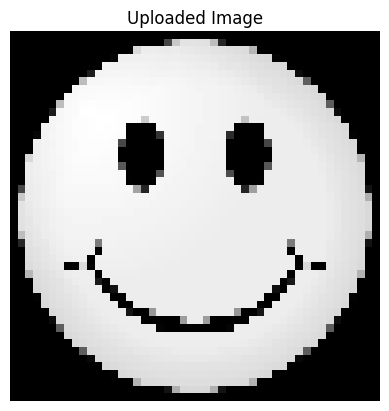

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Replace with your uploaded file name
img_path = list(uploaded.keys())[0]

# Load image in grayscale, resize to 48x48
img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")

# Convert to array
img_array = image.img_to_array(img)   # shape (48,48,1)
img_array = np.expand_dims(img_array, axis=0)  # shape (1,48,48,1)
img_array /= 255.0  # normalize

# Plot the image correctly
plt.imshow(img_array[0].reshape(48,48), cmap='gray')
plt.title("Uploaded Image")
plt.axis("off")
plt.show()


In [ ]:
pred = best_model.predict(img_array)
class_labels = list(train_generator.class_indices.keys())  # same labels as training
predicted_class = class_labels[np.argmax(pred)]

print("Predicted Emotion:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Emotion: happy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


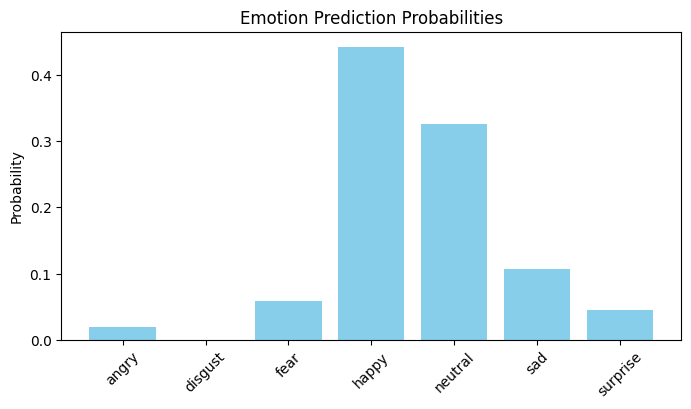

Predicted Emotion: happy


In [ ]:
import matplotlib.pyplot as plt

# Predict probabilities
pred = best_model.predict(img_array)[0]  # shape = (num_classes,)

class_labels = list(train_generator.class_indices.keys())

# Plot bar chart
plt.figure(figsize=(8,4))
plt.bar(class_labels, pred, color='skyblue')
plt.title("Emotion Prediction Probabilities")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

print("Predicted Emotion:", class_labels[np.argmax(pred)])


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step


<Figure size 1000x800 with 0 Axes>

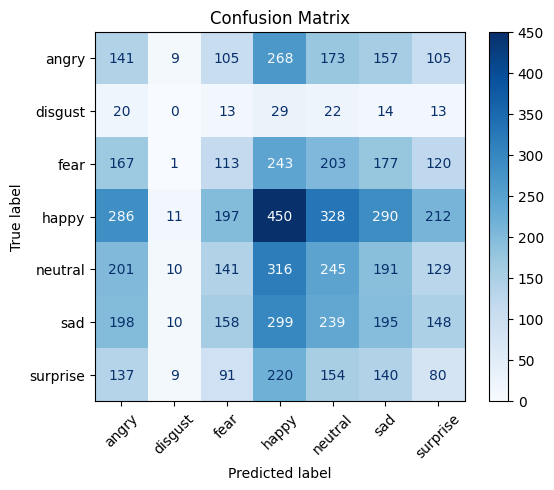

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for all test images
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(10,8))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from google.colab import files
files.download("emotion_model_final.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>